In [1]:
#----------------------------------------#
#              LIBRERIAS                 # 
#----------------------------------------#
from roboticstoolbox import DHRobot
import time
import roboticstoolbox as rtb
import numpy as np
from math import pi
import matplotlib.pyplot as plt
from spatialmath import * 
#----------------------------------------#

In [2]:
#----------------------------------------#
from RobotMetalico import RobotMetalico
My_Robot=RobotMetalico()
#----------------------------------------#

#----------------------------------------#
print(My_Robot)
#----------------------------------------#

┌───┬───────────┬───────────┬───────────────┬────────────────────────────────┐
│id │   link    │  parent   │     joint     │              ETS               │
├───┼───────────┼───────────┼───────────────┼────────────────────────────────┤
│ 0 │     world │         - │               │                                │
│ 1 │ base_link │     world │          Join │                                │
│ 2 │    link_1 │ base_link │       joint_1 │ tz(0.75) * Rz(q0)              │
│ 3 │    link_2 │    link_1 │       joint_2 │ tz(0.55) * Rz(89.95°) * Ry(q1) │
│ 4 │    link_3 │    link_2 │       joint_3 │ tz(1.2) * Ry(q2)               │
│ 5 │    link_4 │    link_3 │       joint_4 │ tz(1.0) * Ry(q3)               │
│ 6 │  @Gripper │    link_4 │ joint_Gripper │ tz(0.7) * Rz(89.95°) * Rz(q4)  │
└───┴───────────┴───────────┴───────────────┴────────────────────────────────┘

┌─────┬──────┬──────┬──────┬──────┬─────┐
│name │ q0   │ q1   │ q2   │ q3   │ q4  │
├─────┼──────┼──────┼──────┼──────┼─────┤
│  q

In [3]:
#------------------------------------------------------#
#                     POSICIÓN HOME                    # 
#------------------------------------------------------#
My_Robot.plot(My_Robot.qa,backend='swift',block=False)
#------------------------------------------------------#

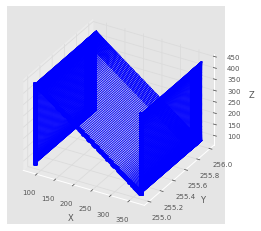

In [4]:
#----------------------------------------#
#             COORDENADAS x,y,z          # 
#----------------------------------------#
T_1=SE3(  x=85, y=255, z=85 )
T_2=SE3(  x=85, y=255, z=435)
T_3=SE3( x=370, y=255, z=85 )
T_4=SE3( x=370, y=255, z=435 )
#----------------------------------------#

#----------------------------------------#
#             MÉTODO CTRAJ               #
#  para calcular trayectoria cartesiana  # 
#----------------------------------------#
L_1=rtb.ctraj(T_1, T_2, 133)
L_2=rtb.ctraj(T_2, T_3, 133)
L_3=rtb.ctraj(T_3, T_4, 133)
#----------------------------------------#

#----------------------------------------#
#             VISUALIZACIÓN              #
#                LETRA N                 # 
#----------------------------------------#
L_1.plot()
L_2.plot()
L_3.plot()
#----------------------------------------#

In [5]:
#----------------------------------------#
#             COORDENADAS x,y,z          # 
#----------------------------------------#
T1=SE3(  x=85.0, y=255.0, z=85.0  )
T2=SE3(  x=85.0, y=255.0, z=435.0 )
T3=SE3( x=370.0, y=255.0, z=85.0  )
T4=SE3( x=370.0, y=255.0, z=435.0 )
#----------------------------------------#


#----------------------------------------#
#             MÉTODO ctraj               #
#  para calcular trayectoria cartesiana  # 
#----------------------------------------#
L1=rtb.ctraj(T1, T2, 75)
L2=rtb.ctraj(T2, T3, 75)
L3=rtb.ctraj(T3, T4, 75)
#----------------------------------------#


#-----------------------------------#
#         CINEMÁTICA INVERSA        #
#-----------------------------------#
Cinem_inver1=My_Robot.ikine_min(L1)
Cinem_inver2=My_Robot.ikine_min(L2)
Cinem_inver3=My_Robot.ikine_min(L3)
#-----------------------------------#


#-------------------------------------------------------------#
#                        MÉTODO jtraj                         #
#            para calcular trayectoria articular              # 
#-------------------------------------------------------------#
Mov1 = rtb.jtraj(Cinem_inver1[0].q, Cinem_inver1[-1].q, 135)
Mov2 = rtb.jtraj(Cinem_inver2[0].q, Cinem_inver2[-1].q, 135)
Mov3 = rtb.jtraj(Cinem_inver3[0].q, Cinem_inver3[-1].q, 135)
#-------------------------------------------------------------#

# Simulación del robot en 'swift'

In [7]:
#--------------------------------|
My_Robot.plot(Mov1.y,block=False)
time.sleep(1.3)
#--------------------------------|
My_Robot.plot(Mov2.y,block=False)
time.sleep(1.3)
#--------------------------------|
My_Robot.plot(Mov3.y,block=False)
#--------------------------------|